In [1]:
# this block is to prepare the fastbook environment, it will install and load common packages.
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


     |████████████████████████████████| 727kB 7.5MB/s 
     |████████████████████████████████| 1.1MB 15.6MB/s 
     |████████████████████████████████| 194kB 31.9MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
Mounted at /content/gdrive


In [2]:
# this block is to load specified packages for training
from google.colab import drive
from pathlib import Path

from PIL import Image

from fastbook import *
from fastai.vision.widgets import *


In [4]:
# this block is to ensure we use gpu to train data
assert os.environ['COLAB_GPU']
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# this block setts the data location for trainning
!rm imgdata
!ls '/content/drive/My Drive/data/New Plant Diseases Dataset(Augmented)'
!ln -s '/content/drive/My Drive/data/New Plant Diseases Dataset(Augmented)' imgdata

train


In [5]:
# this block define the data path
datapath = Path('imgdata')

(256, 256)


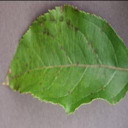

In [10]:
# this block is to check if we are loading the correct data
datapath.ls
img = Image.open('imgdata/train/Apple___Apple_scab/0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417_90deg.JPG')
print(img.shape)
img.to_thumb(128,128)

In [11]:
# this block is to load the data from disk
data= ImageDataLoaders.from_folder(datapath, train = "train", valid_pct=0.2, bs = 64, num_workers = 4)

In [12]:
# this block is to start training the data using vgg16 provided by pytorch
learn = cnn_learner(data, models.vgg16_bn, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.189638,0.034472,0.010356,26:52


epoch,train_loss,valid_loss,error_rate,time
0,0.022809,0.004229,0.001294,08:07
1,0.020946,0.016144,0.005178,08:07
2,0.003377,0.001971,0.000971,08:07
3,0.001296,0.001797,0.000971,08:07


/usr/local/lib/python3.6/dist-packages/fastai/interpret.py:88: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


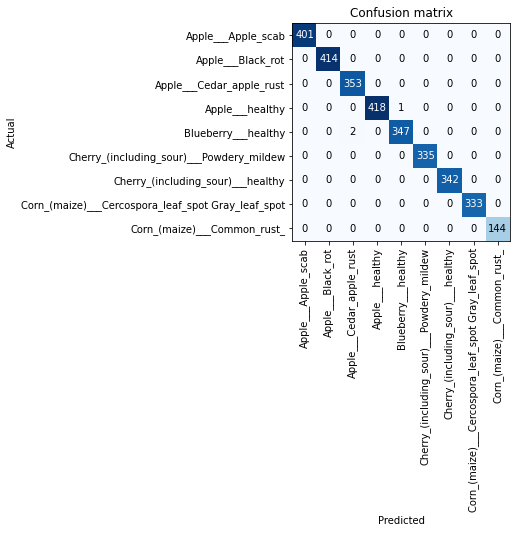

In [13]:
# this block is to show the interpret predictions of the trained model
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [14]:
# this block is to export the trained data to default file 'export.pkl'
learn.export()

In [2]:
from google.colab import drive
from pathlib import Path

from PIL import Image

from fastbook import *
from fastai.vision.widgets import *

In [6]:
learn_inf = load_learner(datapath/'export.pkl')
img = Image.open('imgdata/train/Apple___Apple_scab/0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417_90deg.JPG')
learn_inf.predict('imgdata/train/Apple___Apple_scab/0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417_90deg.JPG')


('Apple___Apple_scab',
 tensor(0),
 tensor([1.0000e+00, 5.9179e-10, 7.7505e-08, 5.2192e-10, 1.1795e-10, 3.9295e-09, 2.7585e-07, 1.9713e-09, 2.0742e-08]))

In [7]:
from fastai.vision.widgets import *
btn_upload = widgets.FileUpload()
btn_classify = widgets.Button(description="Classify")
out_pl = widgets.Output()
lbl_pred = widgets.Label()
lbl_pred.value = "<Class>"
btn_upload.multiple = False

def on_button_clicked(b):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    lbl_pred.value = learn_inf.predict(btn_upload.data[0])[0]
    with out_pl:display(img.to_thumb(256,256))
    btn_upload.value.clear()
    btn_upload.data.clear()

btn_classify.on_click(on_button_clicked)

In [8]:
display(btn_upload, btn_classify, lbl_pred, out_pl)

FileUpload(value={}, description='Upload')

Button(description='Classify', style=ButtonStyle())

Label(value='<Class>')

Output()

In [9]:
!pip install voila
!jupyter serverextension enable voila --sys-prefix

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
